<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Tarea Módulo 03

### Instrucciones

* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_homework_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__: Tomás Tapia C.

__Rol__: 201711049-K

**Indicaciones**: Para el **Ejercicio 1** puedes utilizar tanto `matplotlib` como `altair` según te parezca más conveniente, en ambos casos cada gráfico debe tener elementos mínimos como:
- Título
- Nombre de los ejes en formato _amigable_, por ejemplo, si la columna del dataframe en cuestión tiene por nombre `cost_of_living_index` se espera que el eje del gráfico tenga por nombre `Índice de Costo de Vida`.
- Colores adecuados al tipo de datos.
- Un tamaño adecuado para ver con facilidad en una pantalla con resolución HD o FullHD.

Para el **Ejercicio 2** es obligación utilizar `altair`.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import ipywidgets as widgets

from vega_datasets import data
from ipywidgets import interactive, interact

pd.set_option('display.max_columns', 999)
alt.themes.enable('opaque')

%matplotlib inline

## 1. Índices de Costos de Vida

Estos índices están ajustados a la Ciudad de Nueva York (NYC). Lo que significa que para la Ciudad de Nueva York, cada índice debería marcar 100(%). Si otra ciudad tiene, por ejemplo, un índice de alquiler de 120, significa que en esa ciudad se paga de media por el alquiler un 20% más que en Nueva York. Si una ciudad tiene un índice de alquiler de 70, significa que en esa ciudad los alquileres son de media un 30% más baratos que en Nueva York.

* El Índice de Costo de Vida (Sin Alquiler) es un indicador relativo de los precios de bienes de consumo, incluyendo comestibles, restaurantes, transporte y servicios. El Índice de Costo de Vida no incluye gastos de residencia como alquileres o hipotecas. Si una ciudad tiene un Costo de Vida de 120, significa que Numbeo estima que es un 20% más cara que Nueva York (sin contar alquiler).

* El Índice de Alquiler es una estimación de precios de alquiler de apartamentos de una ciudad comparada con Nueva York. Si el Índice de Alquiler es 80, Numbeo estima que el precio de los alquileres en esa ciudad es de media un 20% más barato que en Nueva York.

* El Índice de Comestibles es una estimación de los precios de la compra de una ciudad en comparación con Nueva York. Para calcular esta sección, Numbeo utiliza el peso de los artículos en la sección "Mercados" por cada ciudad.

* El Índice de Restaurantes es una comparación de precios de comidas y bebidas en bares y restaurantes en comparación con NY.

* El Índice de Costo de Vida más Alquiler es una estimación de precios de consumo incluyendo alquiler en comparación con la Ciudad de Nueva York.

* El Poder Adquisitivo Local muestra la capacidad adquisitiva relativa a la hora de comprar bienes y servicios en una ciudad determinada, con relación al salario medio de la ciudad. Si el poder adquisitivo doméstico es 40, significa que los habitantes de dicha ciudad con salario medio pueden permitirse comprar una media de 60% menos bienes y servicios que los habitantes de Nueva York con salario medio. 

Para más información sobre los pesos utilizados (fórmula completa) puedes visitar: [motivación y metodología](https://es.numbeo.com/coste-de-vida/motivaci%C3%B3n-y-metodolog%C3%ADa).

Para comenzar es necesario instalar el paquete `lxml` en tu entorno virtual de conda para poder descargar los datos. Basta con ejecutar 

`conda install -n mat281 lxml`

O cambia `mat281` por el ambiente que estés utilizando.

Se disponibiliza a continuación la carga de datos de un dataframe.

In [2]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
life_cost = (
    pd.concat(
        {
            year: (
                pd.read_html(f"https://www.numbeo.com/cost-of-living/rankings.jsp?title={year}")[2]
                .rename(columns=lambda x: x.lower().replace(" ", "_"))
                .assign(rank=lambda x: x.index + 1)
                .set_index("rank")
            ) for year in years
        }
    )
    .rename_axis(["year", "rank"])
    .reset_index()
)
life_cost.head()

year  rank                 city  cost_of_living_index  rent_index  \
0  2015     1    Hamilton, Bermuda                163.55      120.02   
1  2015     2  Geneva, Switzerland                145.18       81.46   
2  2015     3   Caracas, Venezuela                141.41       60.46   
3  2015     4  Zurich, Switzerland                141.06       66.39   
4  2015     5       Tromso, Norway                131.45       55.80   

   cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                          142.28           191.71                  132.91   
1                          114.05           161.14                  141.23   
2                          101.86           155.16                  122.27   
3                          104.57           148.56                  146.90   
4                           94.48           127.72                  137.08   

   local_purchasing_power_index  
0                         69.79  
1                        130.21  
2                          9.73  
3                        133.91  
4                        132.41

### Ejercicio 1.1 (5 pts)

Explique lo que se hizo en la celda anterior detalladamente.

_Primero se crea una lista de los años a utilizar. Luego creamos el dataframe "life_cost", donde se concatenan datos por año, se contatena el diccionario con llaves años y argumento el dataset correspondiente a ese año. Este dataset lo importa de internet, donde a las etiquetas de las columnas las pone en minuscula, les saca los espacios (" ") y los reemplaza por un "guion bajo". Tambien crea una nueva columna "rank", que parte del uno. Luego el "for" hace que itere por cada año de la lista "years" y extraiga el dataset con las modificaciones anteriormente dichas. Finalmente renombre la columna "year" y "rank" y resetea los indices para tener un completo dataframe ordenado_

### Ejercicio 1.2 (10 pts)

Genera un histograma del índice del costo de vida (sin alquiler) para cada año (es decir, 6 histogramas).

¿Qué conclusión puedes sacar de estos gráficos?

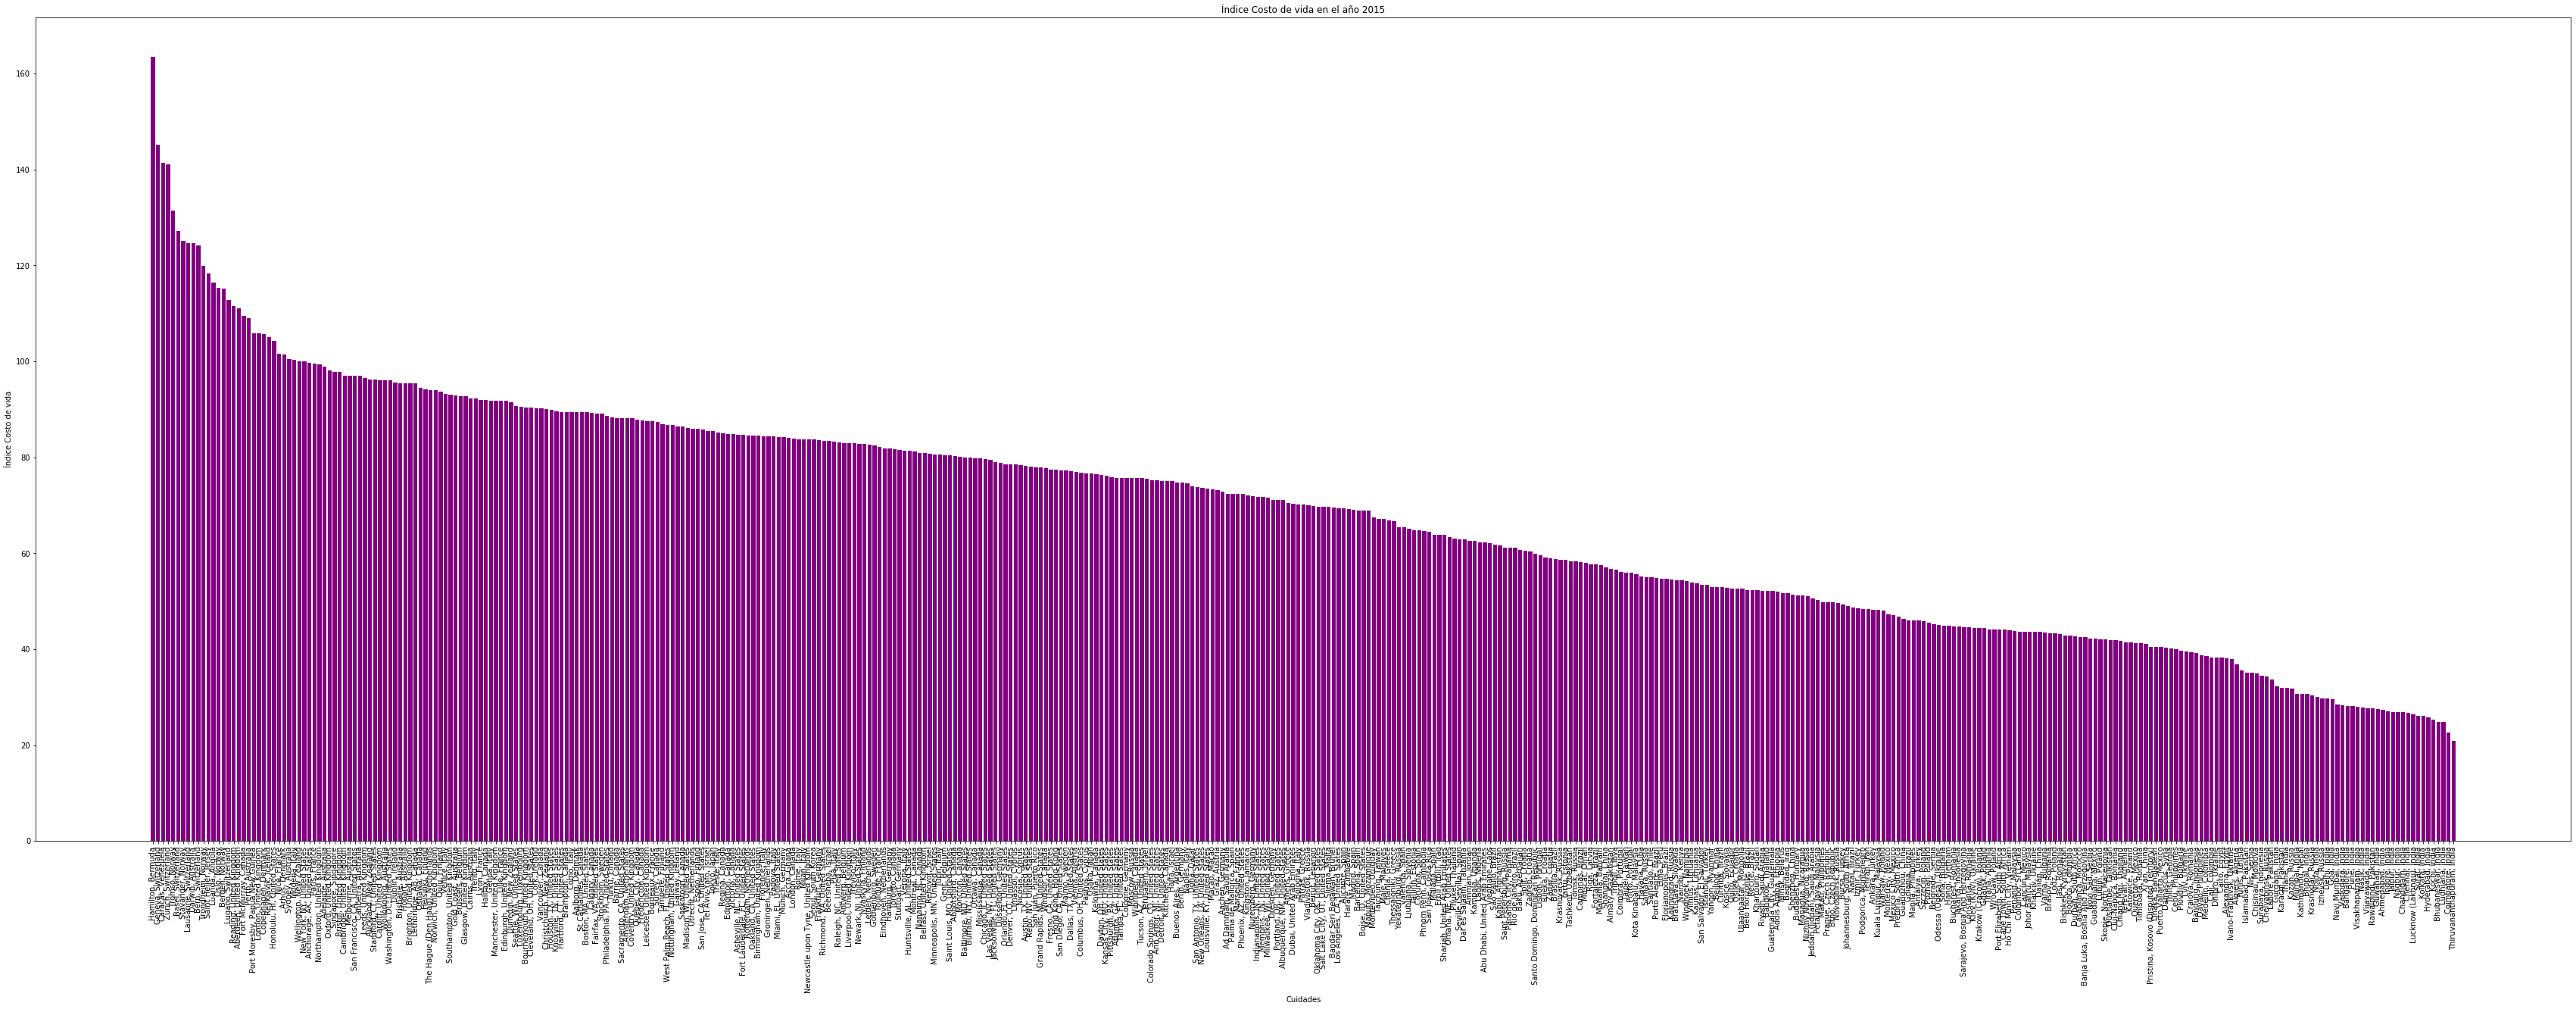

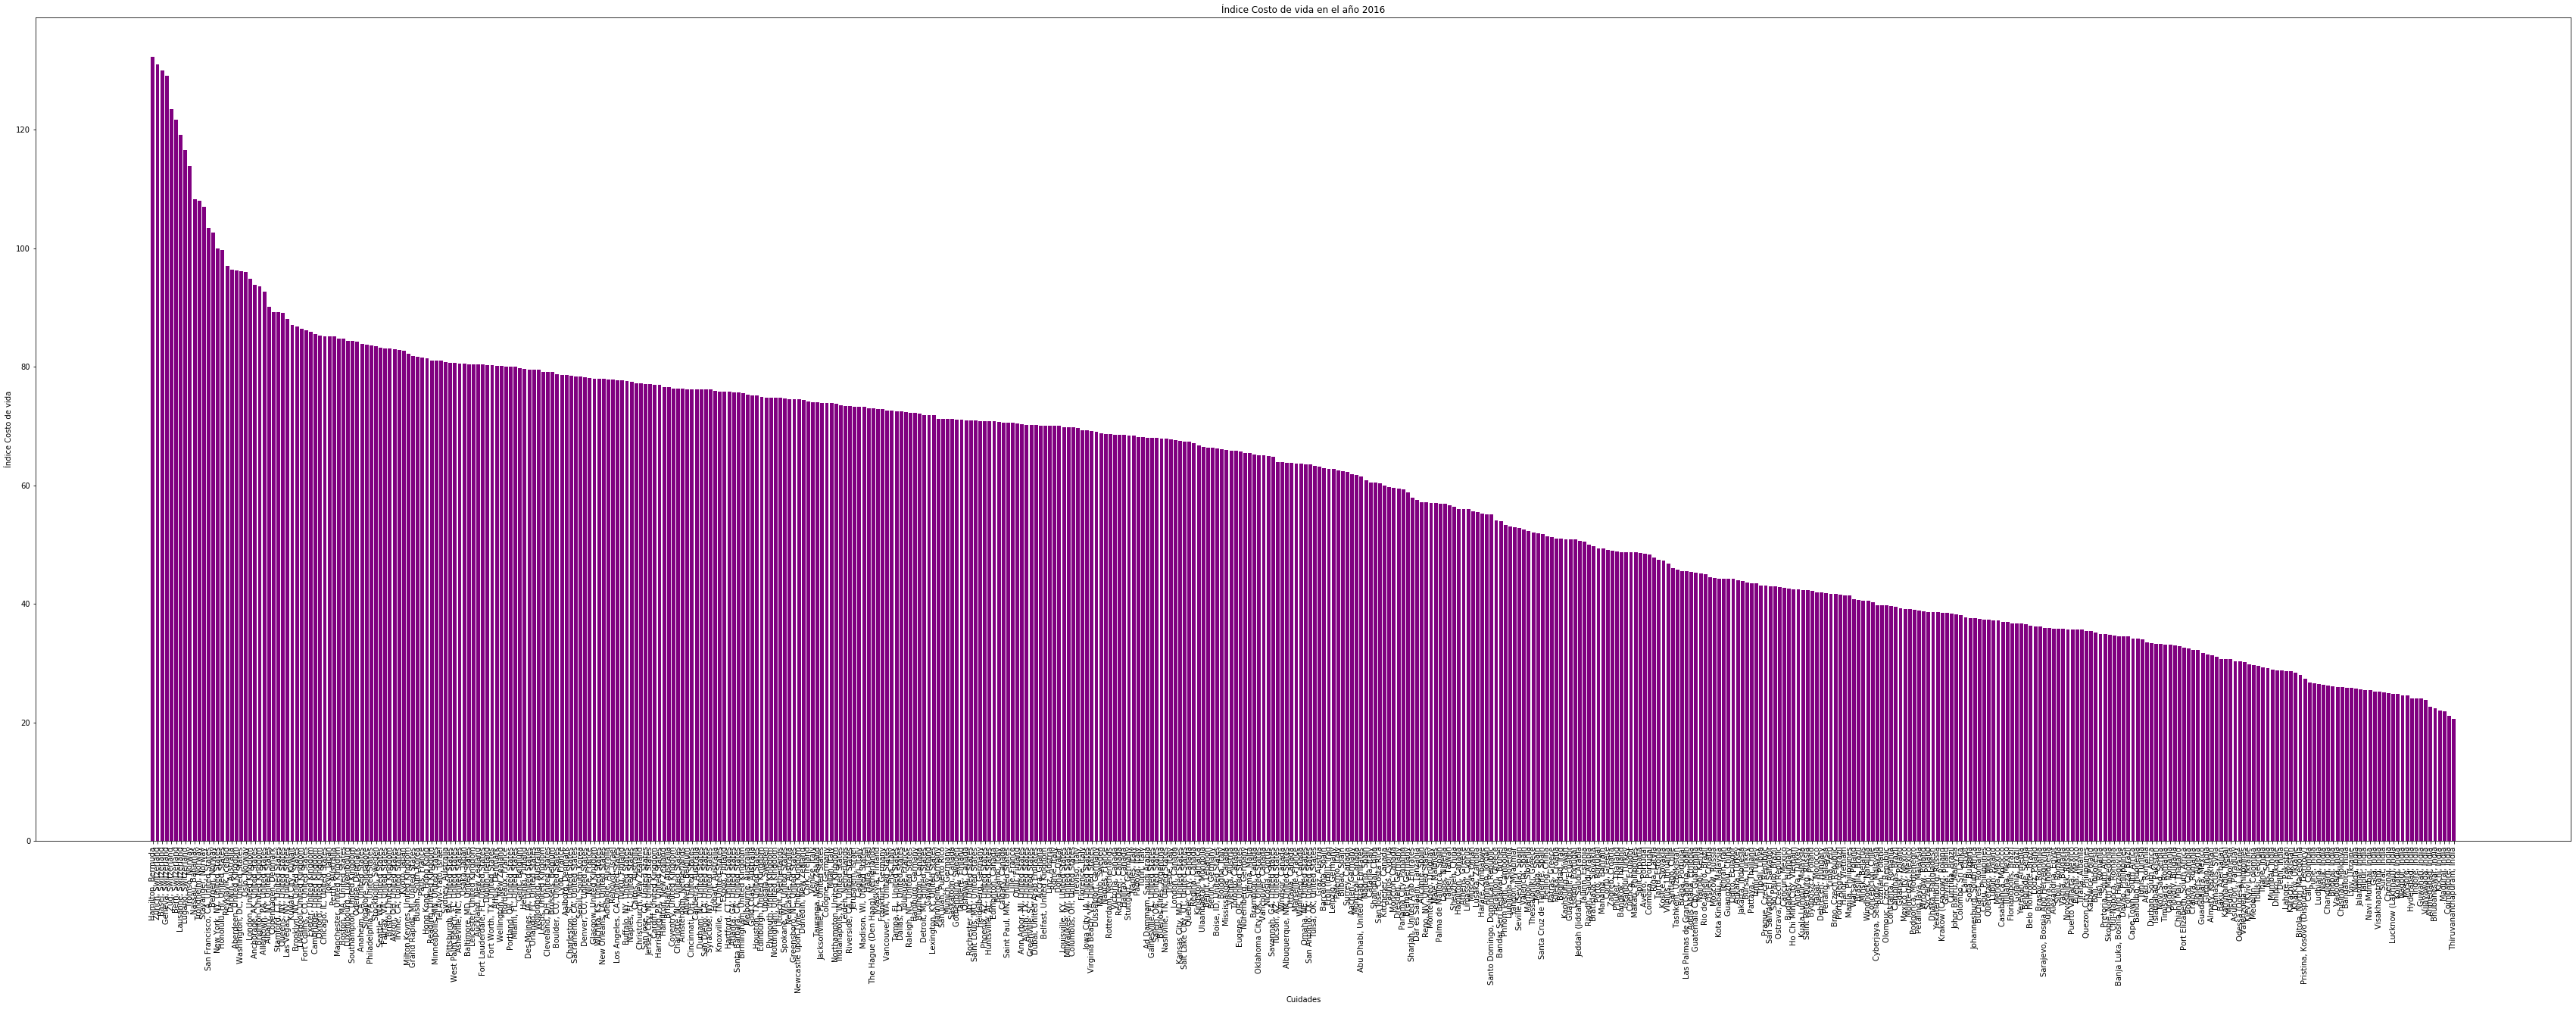

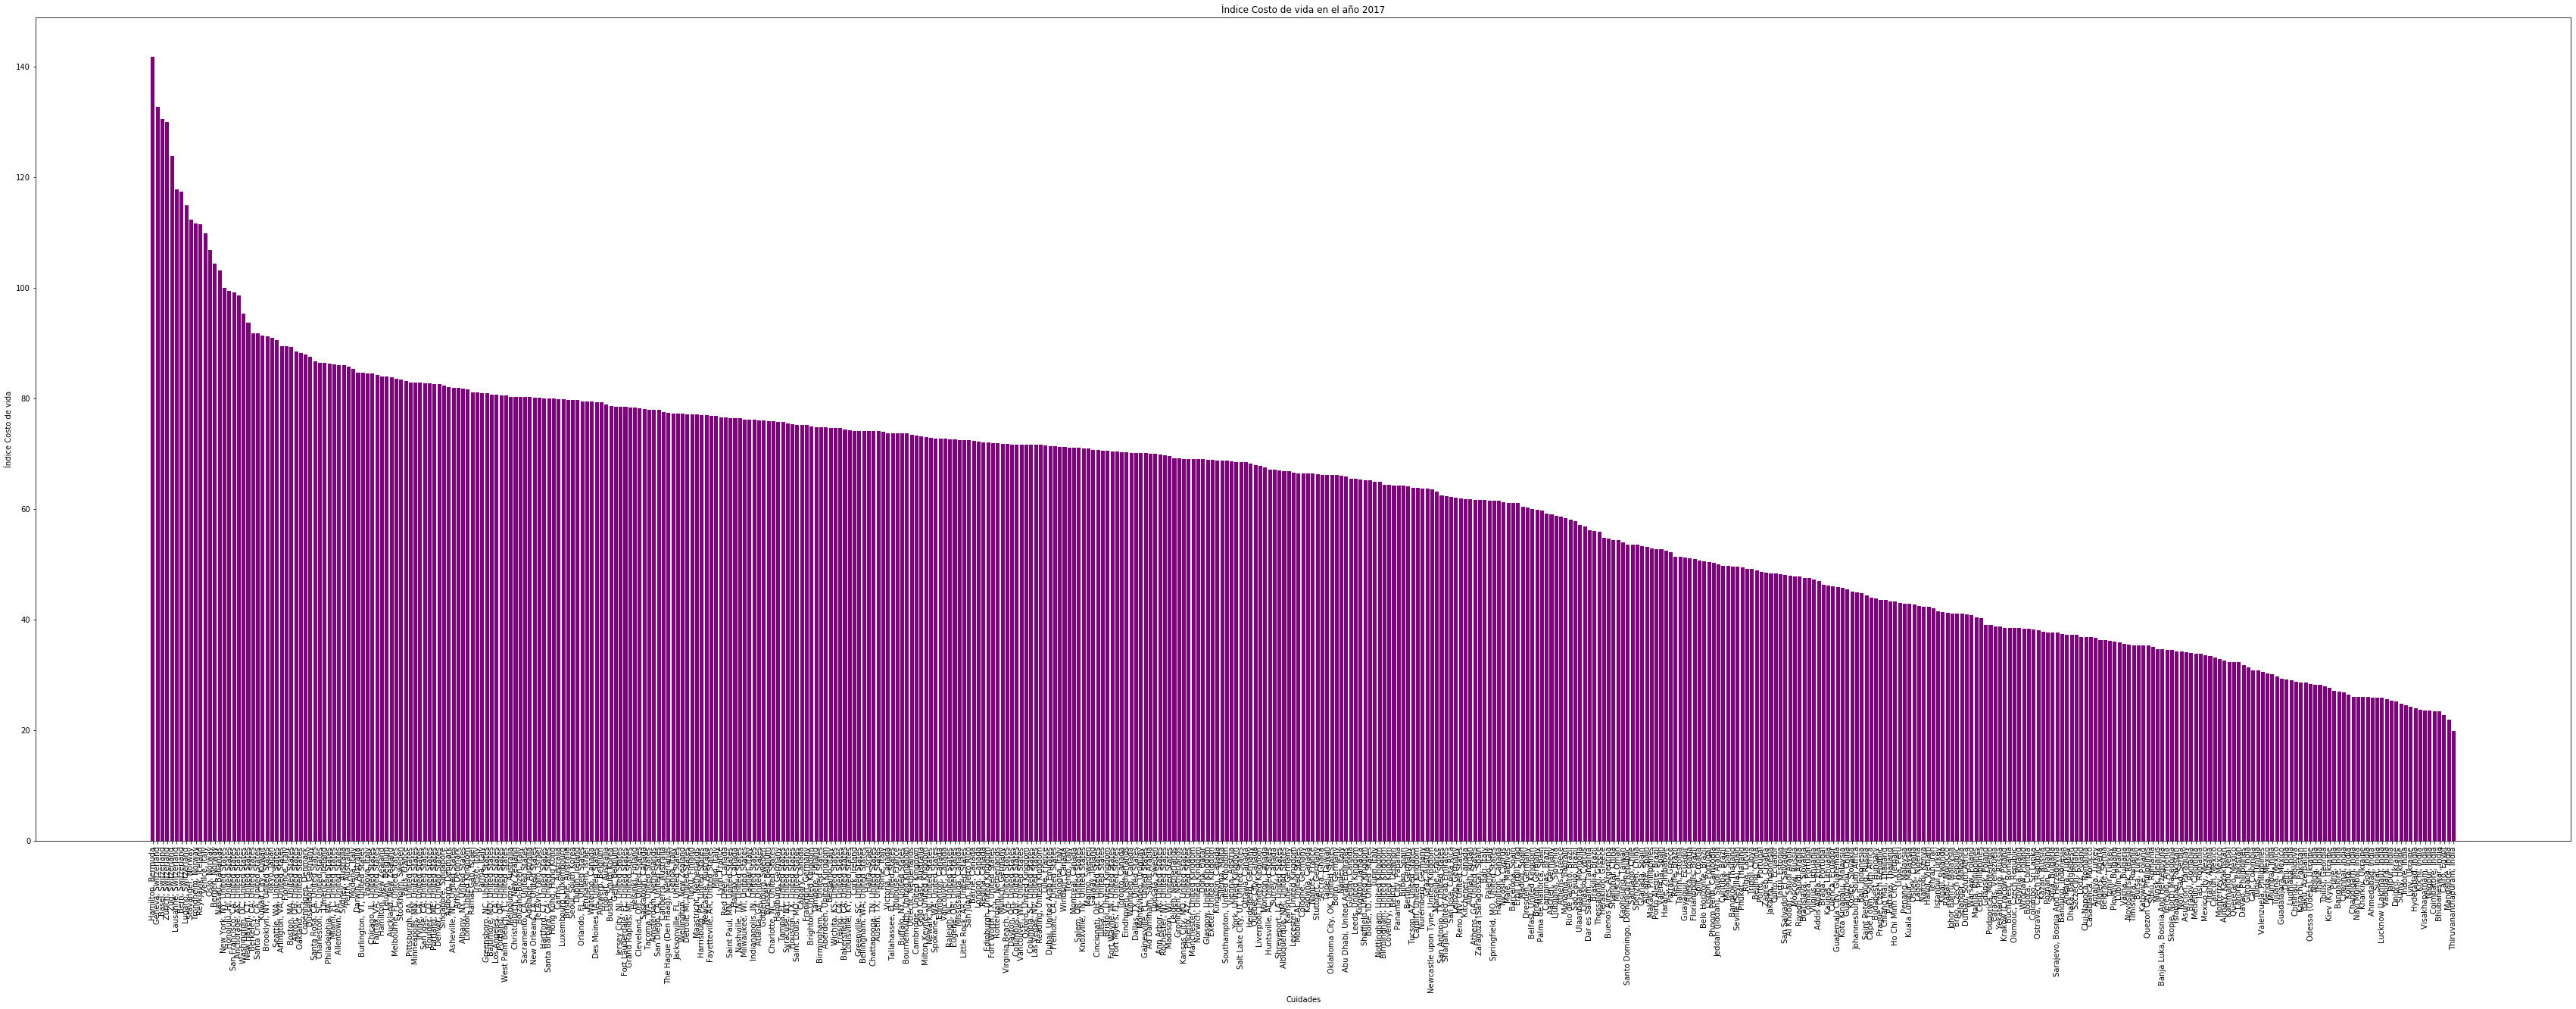

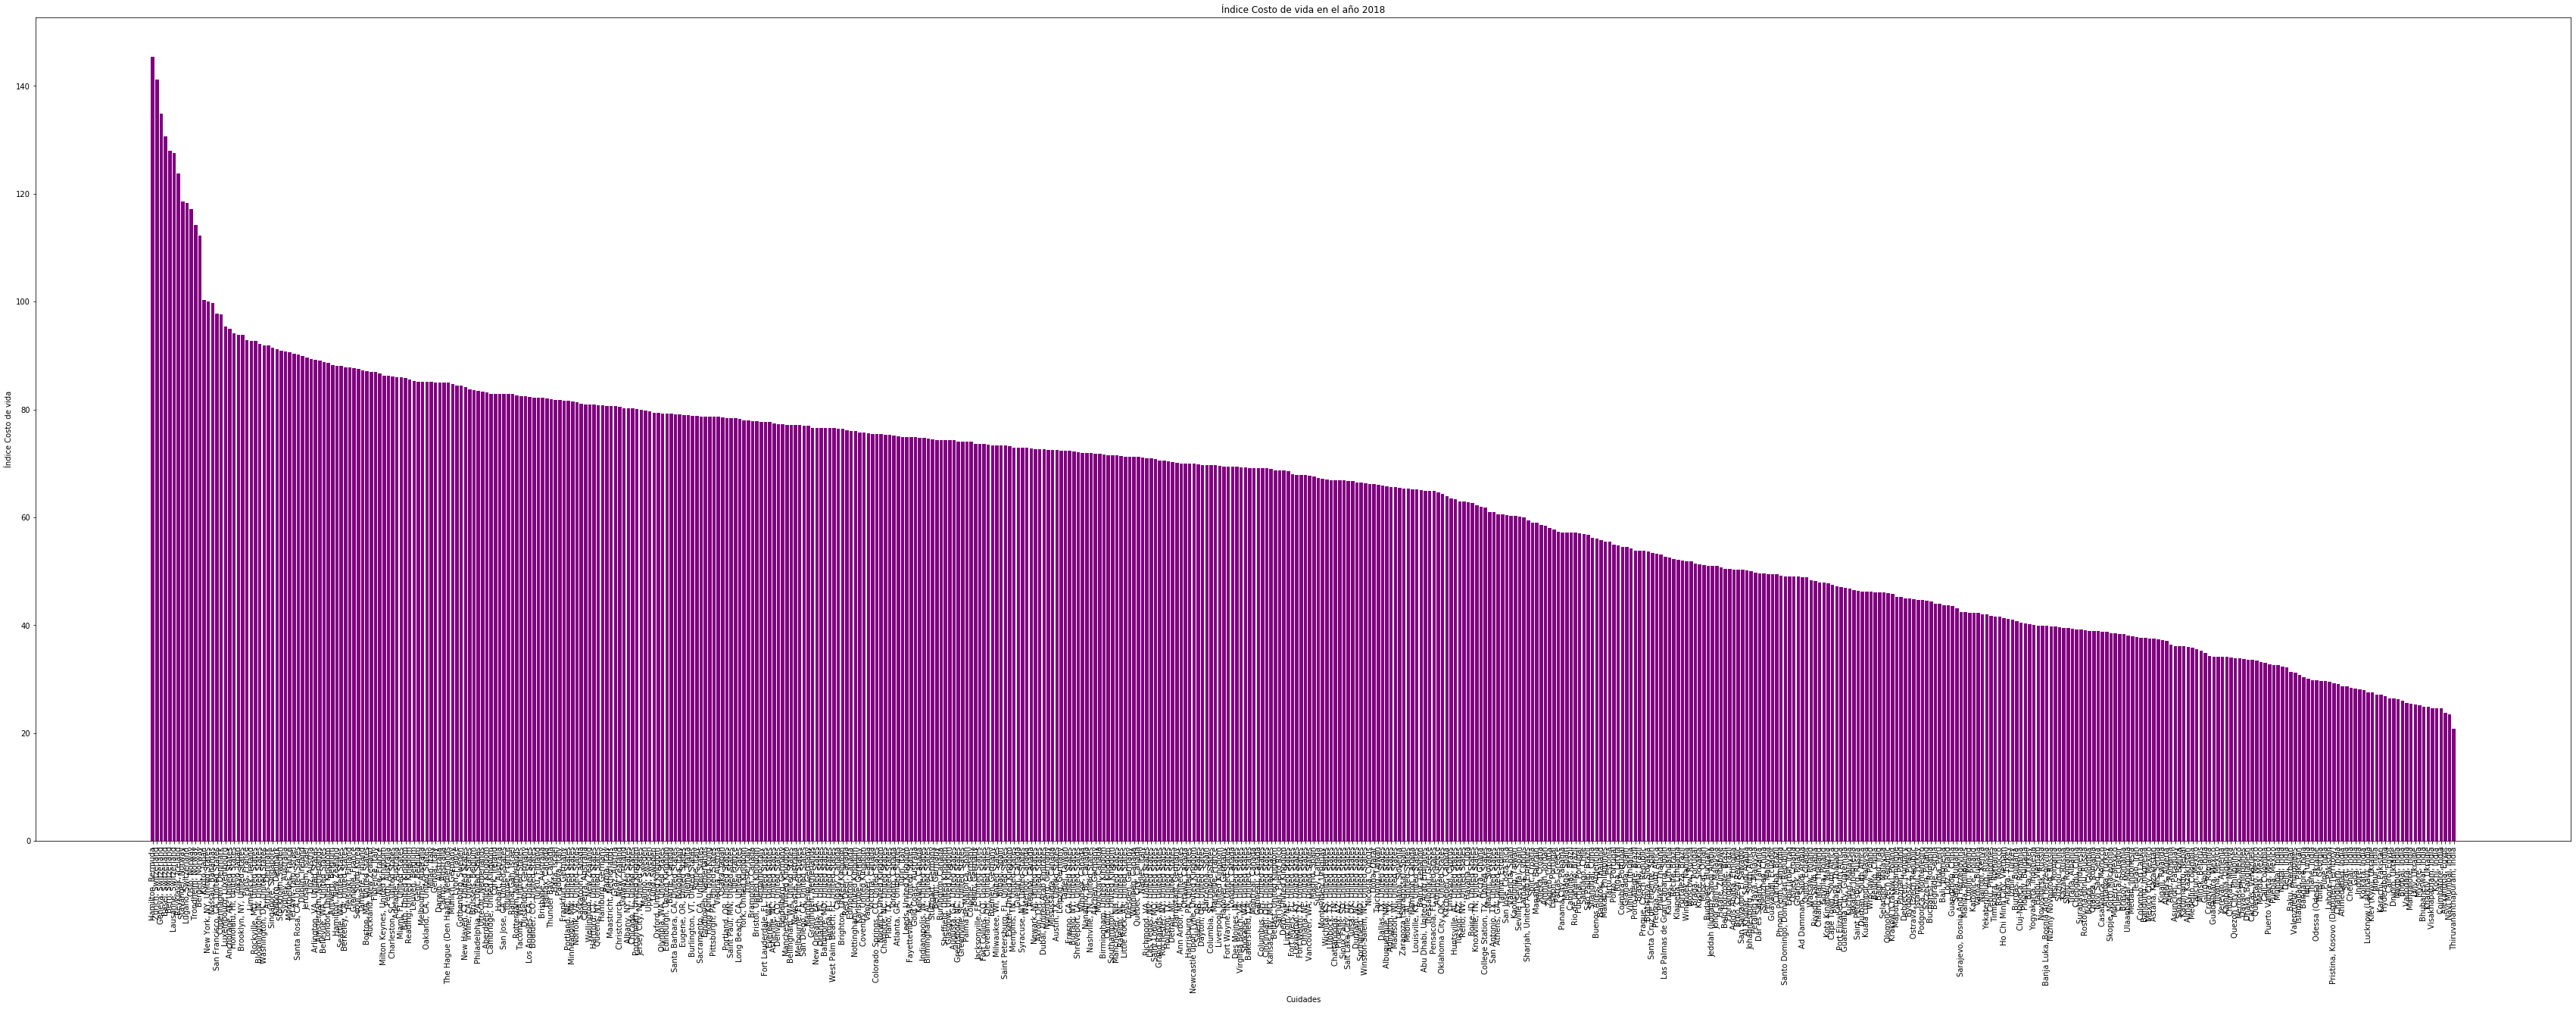

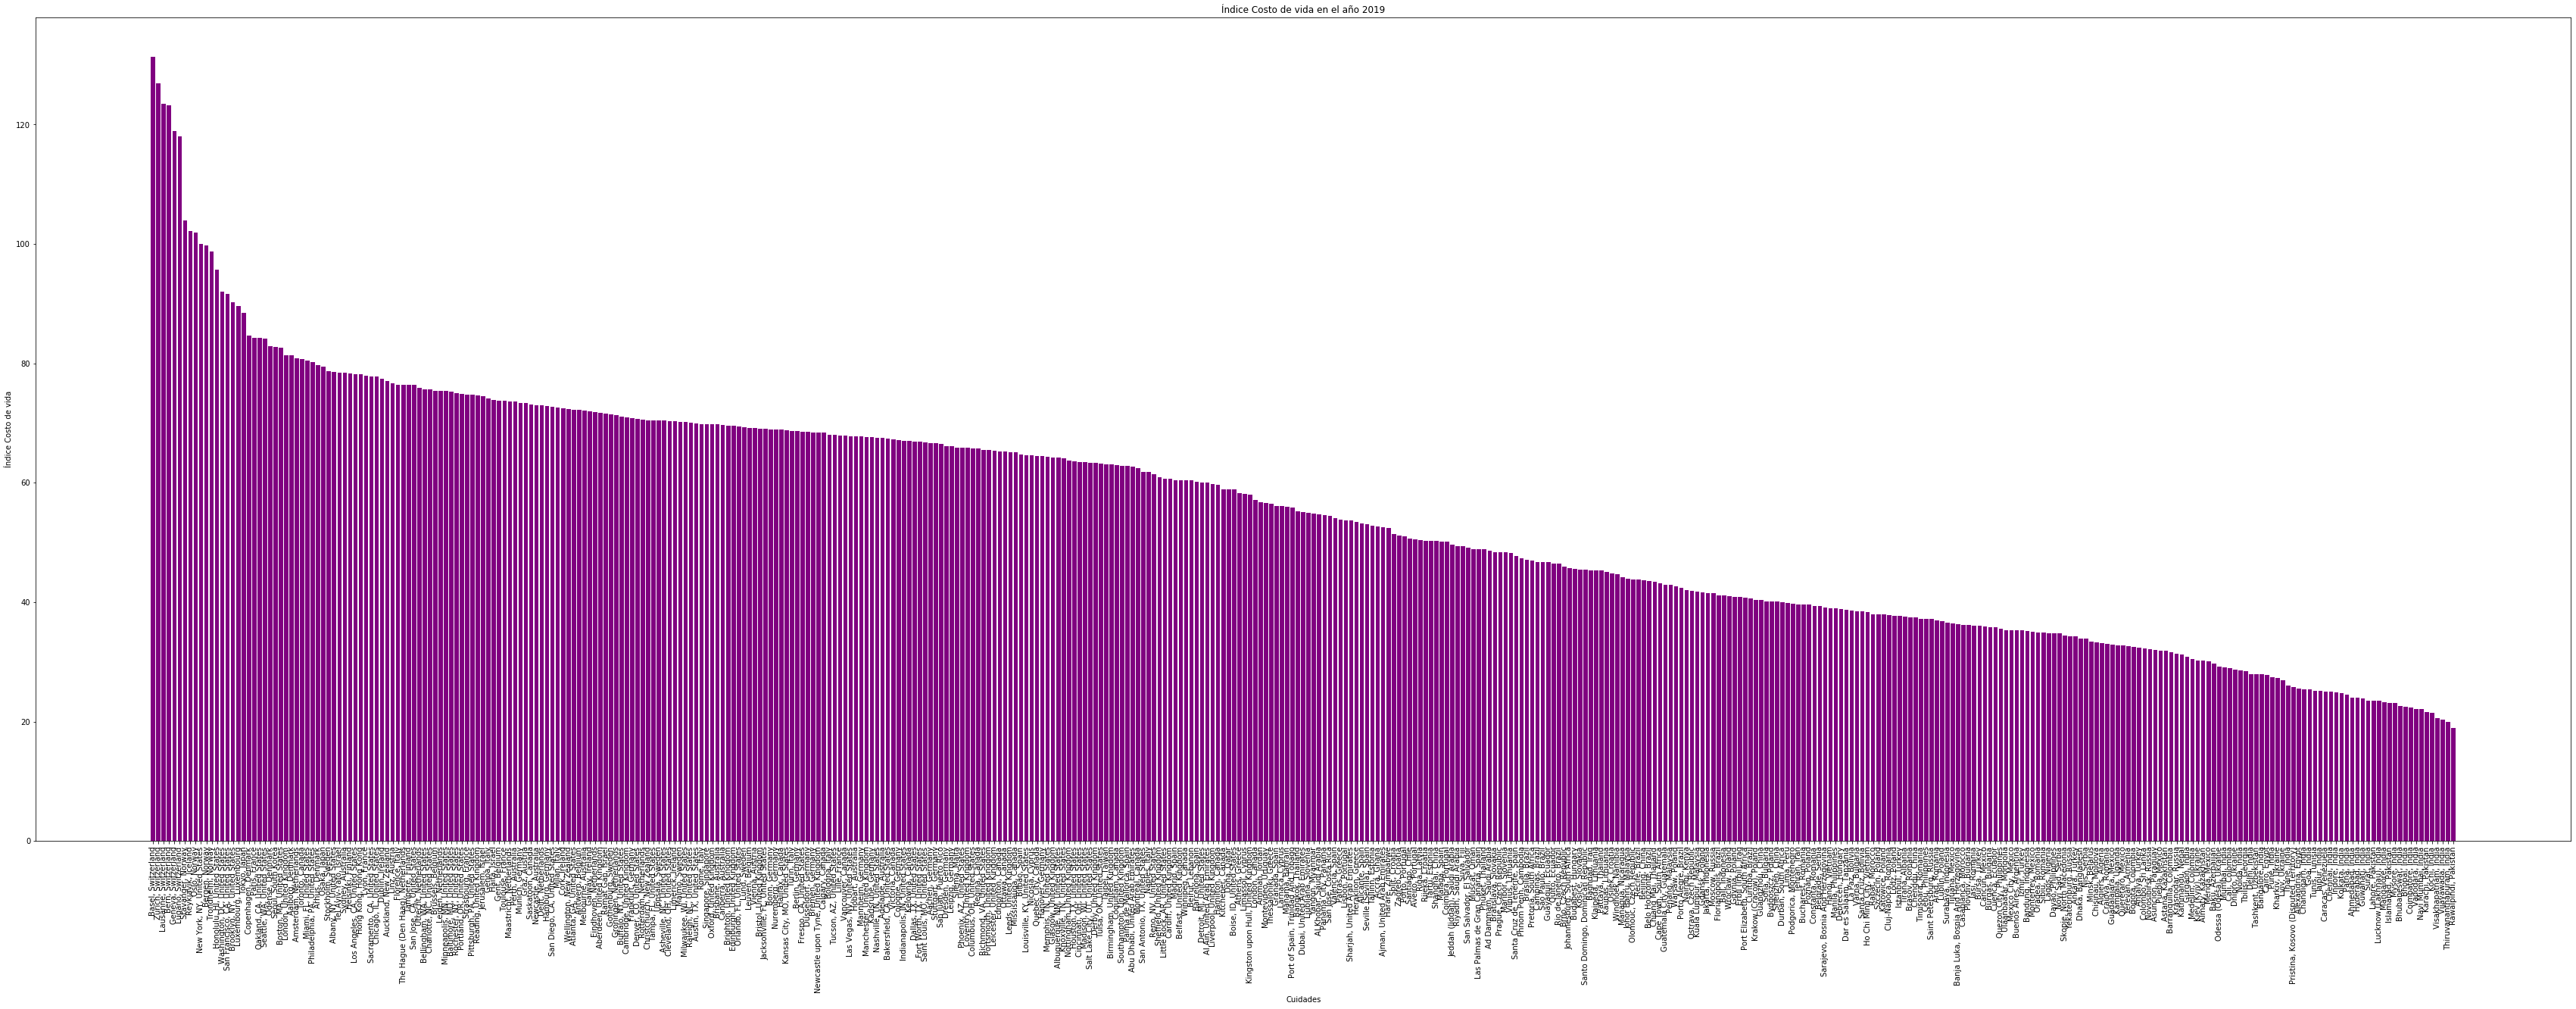

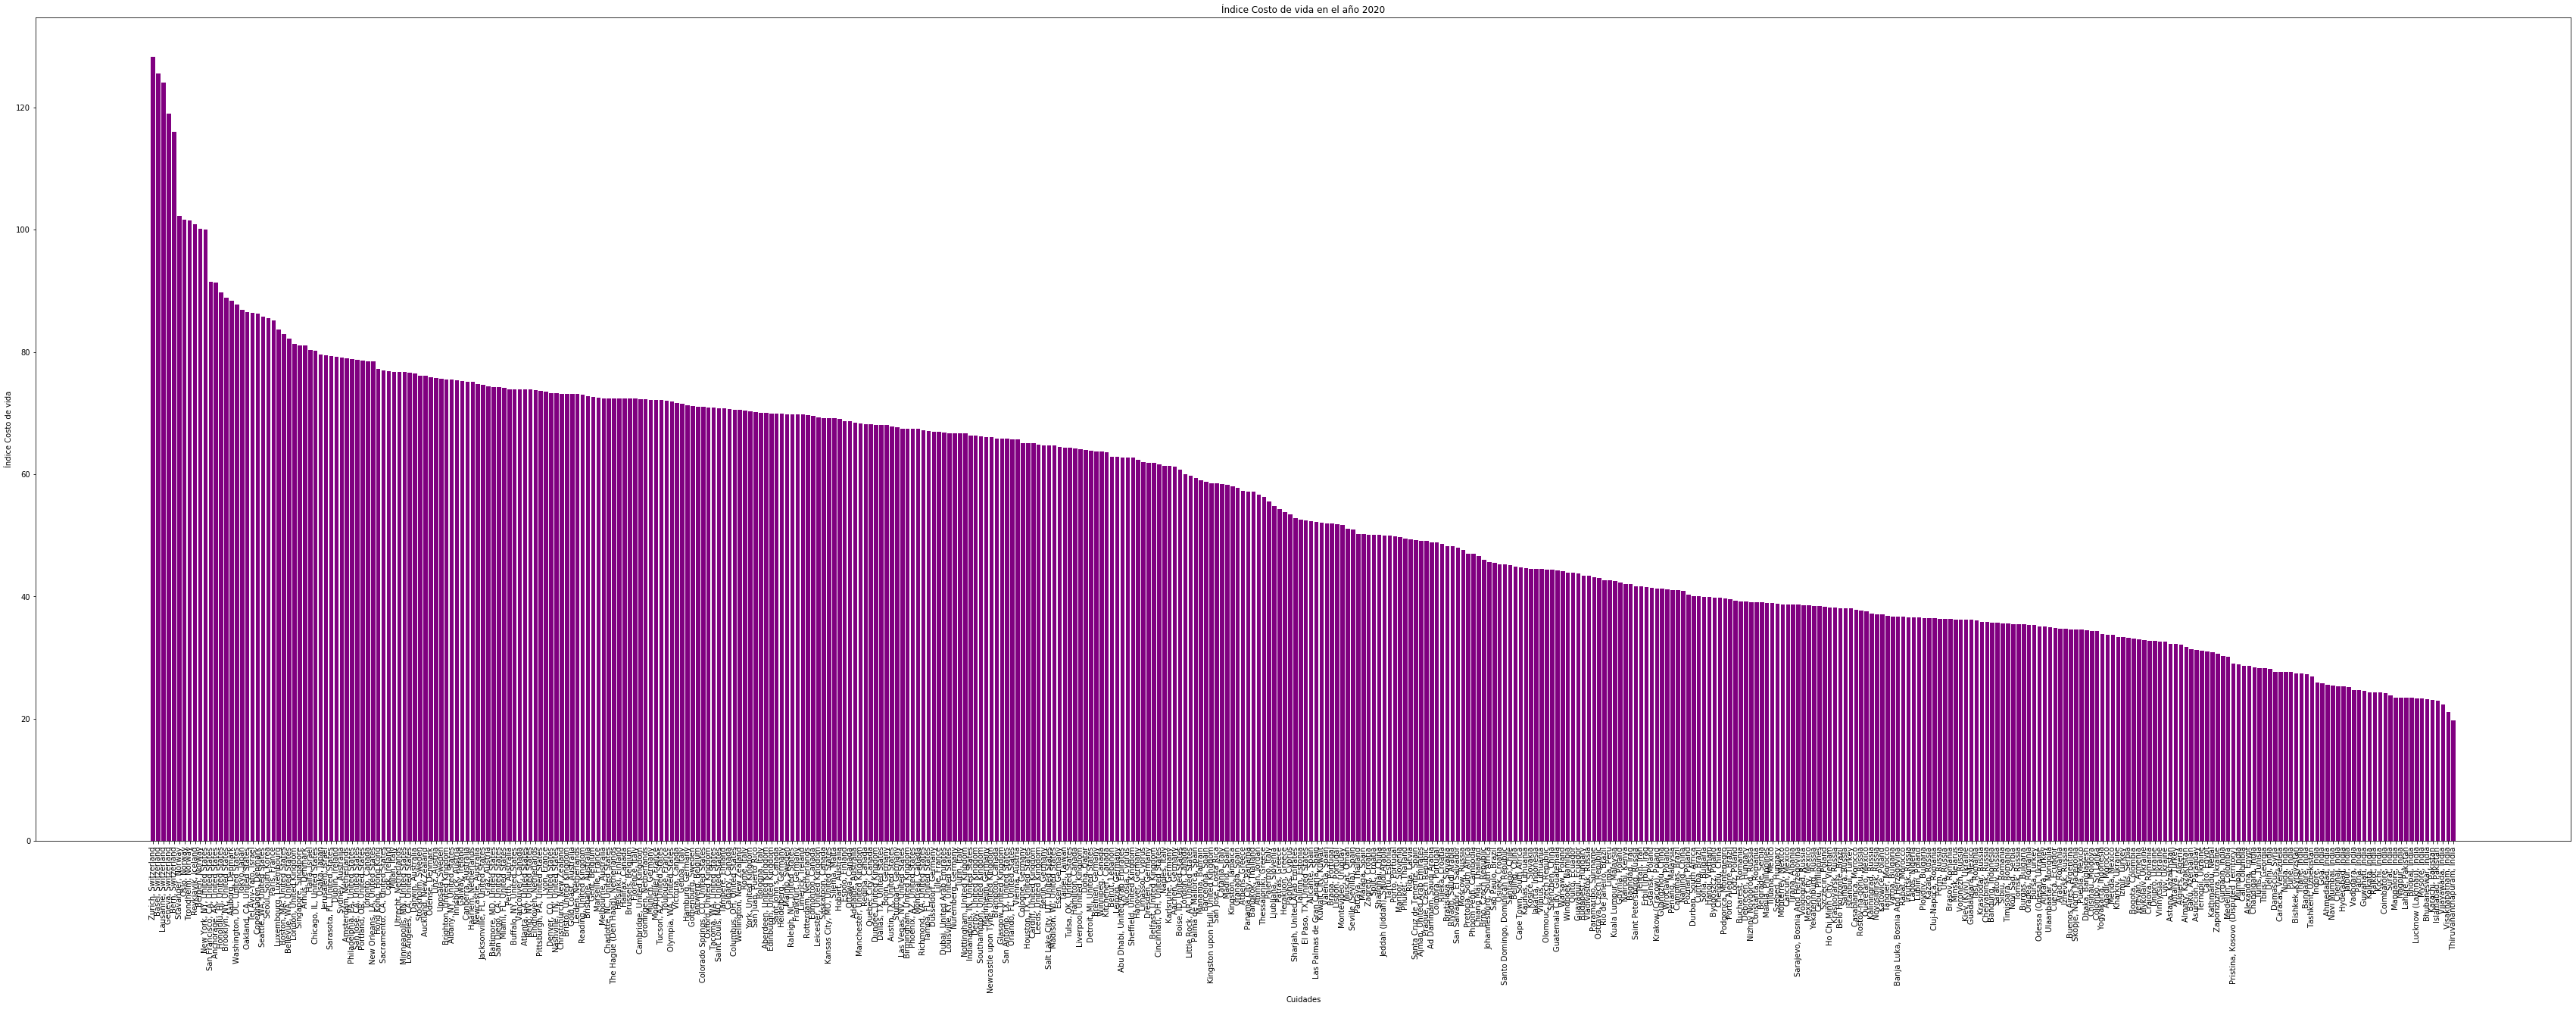

In [3]:
years = [2015, 2016, 2017, 2018, 2019, 2020]

for y in years:
    df_aux = life_cost.query('year==@y')
    x_aux = df_aux.loc[:, 'city']
    y_aux = df_aux.loc[:,'cost_of_living_index']
    fig = plt.figure(figsize= (60,20))
    plt.bar(x_aux, y_aux, color='purple')
    plt.title('Índice Costo de vida en el año ' + str(y))
    plt.xticks(x_aux, rotation='vertical')
    plt.xlabel('Cuidades')
    plt.ylabel('Índice Costo de vida')
    plt.show()

_Este tipo de gráfica, al tener tantas cuidades (eje x) se distorciona y es poco agradable de ver, solo podemos fijarnos en los indices más altos y los más bajos, ya que están ordenado descendentemente. Extrapolando para todos los años sólo podemos fijarnos en el comportamiento de los extremos (más altos o bajos indices). También podemos obtener facilmente un rango de valores aproximado, sabiendo que el índice más alto es tantas veces el más bajo. En conclución, la información obtenida no es muy superficial._

### Ejercicio 1.3 ( pts)

Grafica el índice de restaurantes a través de los años para diez ciudades escogidas pseudo-aleatoriamente (variable `my_cities` de la celda siguiente) en un mismo gráfico. Recuerda escoger el tipo de gráfico adecuadamente.

¿Ves alguna relación? ¿Qué podrías decir del gráfico? ¿Por qué no graficar todas las ciudades en lugar de solo escoger algunas?

In [4]:
rol_seed = 201711049  # Escribe tu rol UTFSM sin número verificador
my_cities = life_cost["city"].drop_duplicates().sample(n=10, random_state=rol_seed).values

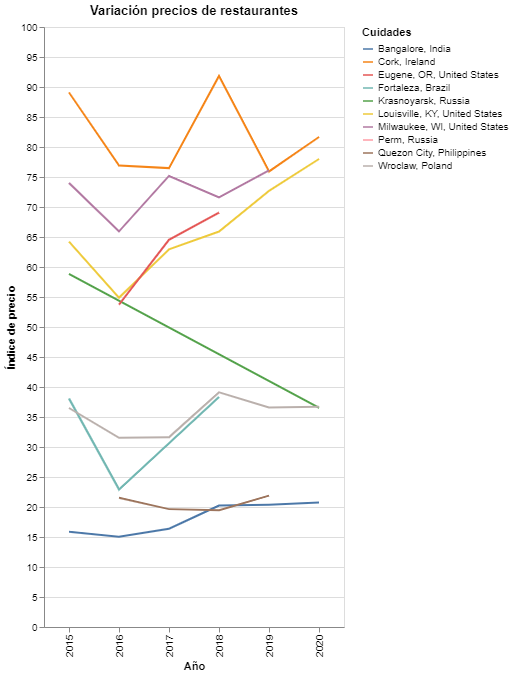

In [5]:
df_aux2 = life_cost[lambda x: x['city'].isin(my_cities)]

alt.Chart(df_aux2).mark_line().encode(
    alt.X('year:O', title='Año'),
    alt.Y('restaurant_price_index:Q', title='Índice de precio'),
    alt.Color('city:N', title='Cuidades')
).properties(
    title=alt.TitleParams(text='Variación precios de restaurantes'),
    height=600, width=300
)

_Podemos ver que en la gran mayoria de las cuidades tuvieron una baja en sus precios del 2015 al 2016, como tambien una tendencia a subir a medida que pasan los años; claro sí, hay excepciones. Este tipo de gráfica hace notar claramete la variación de precios, de forma clara y ordenada, podemos saber de forma rápida la diferencia de costo entre cada cuidad y su evolcion en los años. Cabe destacar que entre más cuidades se pongan, se pierde mucho la visual, ya que serían muchas lineas de colores y no se vería claramente los cambios de índice._

### Ejercicio 1.4

Genera un mapa de calor tal que:

- El eje horizontal corresponda a cada uno de los índices.
- El eje vertical corresponda a cada una de las ciudades de `my_cities`.
- El color y valor en cada celda sea el promedio de los indicadores.
    - El valor de la celda debe tener solo dos decimales.

In [6]:
redable_index_names = {
    'cost_of_living_index': 'Costo de Vida',
    'rent_index': 'Alquiler',
    'cost_of_living_plus_rent_index': 'Costo de Vida + Alquiler',
    'groceries_index': 'Comestibles',
    'restaurant_price_index': 'Restaurantes',
    'local_purchasing_power_index': 'Poder Adquisitivo Local'
}

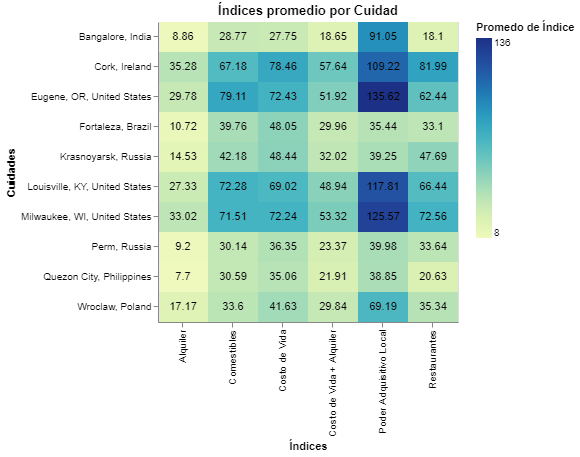

In [7]:
df_aux3 = (life_cost[lambda df: df['city'].isin(my_cities)]
           .drop(['rank', 'year'], axis=1)
           .groupby('city')
           .agg('mean')
           .rename(columns=redable_index_names)
           .reset_index()
           .melt(id_vars=['city'])
           .round(2)
)
df_aux3.head()

base = alt.Chart(df_aux3).mark_rect().encode(
        alt.X('variable:N',title='Índices'),
        alt.Y('city:N',title='Cuidades')
).properties(title=alt.TitleParams(text='Índices promedio por Cuidad')
)

heatmap = base.mark_rect().encode(
    color=alt.Color('value:Q', title='Promedo de Índice')
).properties(
    width=300,
    height=300
)

texto = base.mark_text().encode(text='value:Q')
heatmap + texto

_Con este mapa de calor, vemos un plano general muy claro de la situacion de cada cuidad, ya no haciendolo por año, sino una vista total. Se puede ver que en las cuidades elegidas, Estados Unidos lidera en indices más altos, ya que tiene más Indices opacos que los demás, tambien se ve un alto indice de poder adquisitivo local en el mismo pais._

### Ejercicio 1.5

Primero, agregar la columna `country` al dataframe `life_cost` a partir de la columna `city`. Luego, realizar un scatter plot donde:

- Datos correspondientes al año 2020.
- El eje horizontal corresponda a el Índice de Comestibles.
- El eje vertical corresponda a el Poder Adquisitivo Local.
- El color corresponda al país.
- Debe contener solo 20 países que son escogidos pseudo-aleatoriamente.
    - Para ellos deber agregar la columna `country` al dataframe `life_cost`.
    - Ejecutar la celda sub-siguiente para generar el _np.array_ `my_countries`.
- Se debe utilizar un esquema de color distinto (_color scheme_ o _colormap_), puesto que hay 20 categorías. 
    - En `altair` utilizar el esquema `category20`. [Más información aquí](https://altair-viz.github.io/user_guide/customization.html?highlight=color%20map#color-schemes).
    - En `matplotlib` utilizar el esquema `tab20`. [Más información aquí](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).    
- En caso que los puntos del scatter plot se vean muy pequeños en relación al gráfico debes aumentar su tamaño.

In [8]:
life_cost = life_cost.assign(country = lambda df: df['city'].str.split(',', n=1, expand=True)[1], 
                             city= lambda df2: df2['city'].str.split(',', n=1, expand=True)[0])
life_cost.head()

year  rank      city  cost_of_living_index  rent_index  \
0  2015     1  Hamilton                163.55      120.02   
1  2015     2    Geneva                145.18       81.46   
2  2015     3   Caracas                141.41       60.46   
3  2015     4    Zurich                141.06       66.39   
4  2015     5    Tromso                131.45       55.80   

   cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                          142.28           191.71                  132.91   
1                          114.05           161.14                  141.23   
2                          101.86           155.16                  122.27   
3                          104.57           148.56                  146.90   
4                           94.48           127.72                  137.08   

   local_purchasing_power_index       country  
0                         69.79       Bermuda  
1                        130.21   Switzerland  
2                          9.73     Venezuela  
3                        133.91   Switzerland  
4                        132.41        Norway

In [9]:
my_countries = life_cost.query("year == 2020")["country"].drop_duplicates().sample(n=20, random_state=rol_seed).values

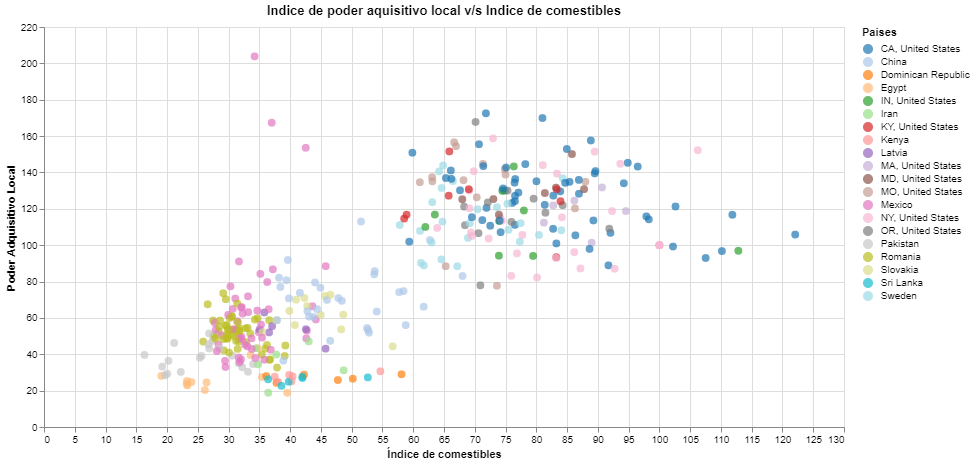

In [10]:
df_aux4 = life_cost[lambda df: df['country'].isin(my_countries)]

alt.Chart(df_aux4).mark_circle(size=60).encode(
    alt.X('groceries_index:Q', title='Índice de comestibles'),
    alt.Y('local_purchasing_power_index:Q', title='Poder Adquisitivo Local'),
    alt.Color('country:N', title='Paises',scale=alt.Scale(scheme='category20')),
    tooltip=[ 'country', 'groceries_index', 'local_purchasing_power_index']
).properties(
    height=400,
    width=800,
    title=alt.TitleParams(text='Indice de poder aquisitivo local v/s Indice de comestibles')
).interactive()

¿Qué comentarios puedes entregar al comparar los países seleccionados?

_Podemos notar dos grandes acumulaciones de puntos, donde las potencias mundiales (USA, China) lideran con mejor poder adquisitivo e indice de comestibles (acumulacion de más arriba a la izquierda), y tambien los con menores indices, tales como Romania, Kenya (acumulacion de más abajo a la derecha). _

### Ejercicio 1.6

El siguiente ejercicio necesita de un conjunto de datos adicional, que relacione el país con el continente. A continuación se disponibiliza el dataframe `countries` con las columnas `country` y `continent`.

Agrega la columna `continent` al dataframe `life_cost` realizando un _merge_ con `countries`.

In [11]:
rename_countries_dict = {
    "Czechia": "Czech Republic",
    "Bosnia and Herzegovina": "Bosnia And Herzegovina",
    "Kosovo": "Kosovo (Disputed Territory)",
    "North Macedonia": "Macedonia",
    "Trinidad and Tobago": "Trinidad And Tobago"
}

countries = (
    pd.read_html("http://www.geonames.org/countries/", keep_default_na=False)[1]
    .rename(columns=lambda x: x.lower())
    .assign(country=lambda x: x["country"].replace(rename_countries_dict))
    .loc[:, ["country", "continent"]]
)
countries.head()

country continent
0               Andorra        EU
1  United Arab Emirates        AS
2           Afghanistan        AS
3   Antigua and Barbuda        NA
4              Anguilla        NA

In [12]:
life_cost = pd.merge(life_cost, countries, how='inner', on='country')

A continuación genera un gráfico que posea 36 subgráficos, estos se generan realizando todas las permutaciones (con repetición) de dos índices. 

Cada sub-gráfico:
- Debe corresponder solo al año 2020.
- Debe ser un scatter plot.
- Los ejes horizontal y vertical corresponden al par de índices de la permutación
- El color de cada punto se corresponde al continente.
- La opacidad de cada punto debe ser `0.3`.

In [13]:
## FIX ME PLEASE ##

## 2. Películas

Este ejercicio utilizará el dataset de películas que viene pre-cargado en `vega_datasets`. Es intereasnte pues posee columnas de distintos tipos y una cantidad relativamente decente de registros.

In [14]:
# data.movies?

In [15]:
movies_raw = data.movies()
movies_raw.head()

Title   US_Gross  Worldwide_Gross  US_DVD_Sales  \
0              The Land Girls   146083.0         146083.0           NaN   
1      First Love, Last Rites    10876.0          10876.0           NaN   
2  I Married a Strange Person   203134.0         203134.0           NaN   
3        Let's Talk About Sex   373615.0         373615.0           NaN   
4                        Slam  1009819.0        1087521.0           NaN   

   Production_Budget Release_Date MPAA_Rating  Running_Time_min Distributor  \
0          8000000.0  Jun 12 1998           R               NaN    Gramercy   
1           300000.0  Aug 07 1998           R               NaN      Strand   
2           250000.0  Aug 28 1998        None               NaN   Lionsgate   
3           300000.0  Sep 11 1998        None               NaN   Fine Line   
4          1000000.0  Oct 09 1998           R               NaN     Trimark   

                Source Major_Genre         Creative_Type Director  \
0                 None        None                  None     None   
1                 None       Drama                  None     None   
2                 None      Comedy                  None     None   
3                 None      Comedy                  None     None   
4  Original Screenplay       Drama  Contemporary Fiction     None   

   Rotten_Tomatoes_Rating  IMDB_Rating  IMDB_Votes  
0                     NaN          6.1      1071.0  
1                     NaN          6.9       207.0  
2                     NaN          6.8       865.0  
3                    13.0          NaN         NaN  
4                    62.0          3.4       165.0

### Ejercicio 2.1

Pre-procesamiento:

Crea un dataframe llamado `movies` tal que sea igual a `movies_raw` salvo que la columna `Release_Date` debes convertrla a tipo `datetime` (recuerda utilizar `pd.to_datetime`).

Este conjunto de datos posee algunos errores, a medida que vayas avanzando en el desarrollo de estas visualizaciones te irás dando cuenta de ellos y __debes solucionarlos!__.

A modo de ejemplo, hay películas que tienen fechas de estreno incorrectas, a cualquiera que sea del año 2020 en adelante hay que restarle 100 años. Ver _King Kong (1933)_ y su fecha de estreno el año 2033.

In [16]:
## Arreglar estrenos a partir del año 2020
movies_raw['Release_Date'] = movies_raw['Release_Date'].apply(lambda col: pd.to_datetime(col)- pd.DateOffset(years=100)
                              if pd.to_datetime(col) > pd.to_datetime('2020-01-01') 
                              else pd.to_datetime(col)
                             )

In [17]:
## Generar dataframe movies a partir de movies_raw
movies = movies_raw
movies.head()

Title   US_Gross  Worldwide_Gross  US_DVD_Sales  \
0              The Land Girls   146083.0         146083.0           NaN   
1      First Love, Last Rites    10876.0          10876.0           NaN   
2  I Married a Strange Person   203134.0         203134.0           NaN   
3        Let's Talk About Sex   373615.0         373615.0           NaN   
4                        Slam  1009819.0        1087521.0           NaN   

   Production_Budget Release_Date MPAA_Rating  Running_Time_min Distributor  \
0          8000000.0   1998-06-12           R               NaN    Gramercy   
1           300000.0   1998-08-07           R               NaN      Strand   
2           250000.0   1998-08-28        None               NaN   Lionsgate   
3           300000.0   1998-09-11        None               NaN   Fine Line   
4          1000000.0   1998-10-09           R               NaN     Trimark   

                Source Major_Genre         Creative_Type Director  \
0                 None        None                  None     None   
1                 None       Drama                  None     None   
2                 None      Comedy                  None     None   
3                 None      Comedy                  None     None   
4  Original Screenplay       Drama  Contemporary Fiction     None   

   Rotten_Tomatoes_Rating  IMDB_Rating  IMDB_Votes  
0                     NaN          6.1      1071.0  
1                     NaN          6.9       207.0  
2                     NaN          6.8       865.0  
3                    13.0          NaN         NaN  
4                    62.0          3.4       165.0

Rellena los registros nulos de la columna `Major_Genre` con el valor `Unknown`.

In [18]:
movies['Major_Genre'] = movies['Major_Genre'].fillna('Unknow')

Para que todos los gráficos de aquí en adelante funcionen bien vamos a eliminar los registros/filas/películas que tengan algún elemento nulo dentro de las siguientes columnas:

- `US_Gross`
- `Worldwide_Gross`
- `Production_Budget`
- `Release_Date`
- `IMDB_Rating`

In [19]:
movies.dropna(subset=['US_Gross', 'Worldwide_Gross', 'Production_Budget', 'Release_Date', 'IMDB_Rating'])

Title    US_Gross  Worldwide_Gross  US_DVD_Sales  \
0                 The Land Girls    146083.0         146083.0           NaN   
1         First Love, Last Rites     10876.0          10876.0           NaN   
2     I Married a Strange Person    203134.0         203134.0           NaN   
4                           Slam   1009819.0        1087521.0           NaN   
6                      Following     44705.0          44705.0           NaN   
...                          ...         ...              ...           ...   
3195                  Zombieland  75590286.0       98690286.0    28281155.0   
3196  Zack and Miri Make a Porno  31452765.0       36851125.0    21240321.0   
3198                        Zoom  11989328.0       12506188.0     6679409.0   
3199         The Legend of Zorro  45575336.0      141475336.0           NaN   
3200           The Mask of Zorro  93828745.0      233700000.0           NaN   

      Production_Budget Release_Date MPAA_Rating  Running_Time_min  \
0             8000000.0   1998-06-12           R               NaN   
1              300000.0   1998-08-07           R               NaN   
2              250000.0   1998-08-28        None               NaN   
4             1000000.0   1998-10-09           R               NaN   
6                6000.0   1999-04-04           R               NaN   
...                 ...          ...         ...               ...   
3195         23600000.0   2009-10-02           R              87.0   
3196         24000000.0   2008-10-31           R             101.0   
3198         35000000.0   2006-08-11          PG               NaN   
3199         80000000.0   2005-10-28          PG             129.0   
3200         65000000.0   1998-07-17       PG-13             136.0   

        Distributor                        Source Major_Genre  \
0          Gramercy                          None      Unknow   
1            Strand                          None       Drama   
2         Lionsgate                          None      Comedy   
4           Trimark           Original Screenplay       Drama   
6         Zeitgeist                          None      Unknow   
...             ...                           ...         ...   
3195  Sony Pictures           Original Screenplay      Comedy   
3196  Weinstein Co.           Original Screenplay      Comedy   
3198  Sony Pictures  Based on Comic/Graphic Novel   Adventure   
3199  Sony Pictures                        Remake   Adventure   
3200  Sony Pictures                        Remake   Adventure   

             Creative_Type           Director  Rotten_Tomatoes_Rating  \
0                     None               None                     NaN   
1                     None               None                     NaN   
2                     None               None                     NaN   
4     Contemporary Fiction               None                    62.0   
6                     None  Christopher Nolan                     NaN   
...                    ...                ...                     ...   
3195               Fantasy    Ruben Fleischer                    89.0   
3196  Contemporary Fiction        Kevin Smith                    65.0   
3198            Super Hero       Peter Hewitt                     3.0   
3199    Historical Fiction    Martin Campbell                    26.0   
3200    Historical Fiction    Martin Campbell                    82.0   

      IMDB_Rating  IMDB_Votes  
0             6.1      1071.0  
1             6.9       207.0  
2             6.8       865.0  
4             3.4       165.0  
6             7.7     15133.0  
...           ...         ...  
3195          7.8     81629.0  
3196          7.0     55687.0  
3198          3.4      7424.0  
3199          5.7     21161.0  
3200          6.7      4789.0  

[2982 rows x 16 columns]

### Ejercicio 2.2

Define la función `movies_chart` tal que: 

- Los argumentos sean `year`, `imdb_rating`, `genre`, `budget` y `ww_gross` con valor por defecto `None`. 
    * Cada uno de estos argumentos es una tupla de dos elementos, que corresponden a un valor mínimo y máximo, salvo `genre` que es una tupla de `strings`. 
- Se define el dataframe `data` que es una copia del dataframe `movies`.
- Luego se debe filtrar el dataframe `data` de la siguiente forma:
    * `year` filtra la columna `Release_Date` tal que $year[0] \leq year(Release_Date) \leq year[1]$.
    * `imdb_rating` filtra la columna `IMDB_Rating` tal que $imdb_rating[0] \leq IMDB_Rating \leq imdb_rating[1]$.
    * `genre` filtra la columna `Major_Genre` tal que $genre[0] \in Major\_Genre$.
    * `budget` filtra la columna `Production_Budget` tal que $budget[0] \leq Production_Budget \leq budget[1]$.
    * `ww_gross` filtra la columna `Worldwide_Gross` tal que $ww_gross[0] \leq Worldwide_Gross \leq ww_gross[1]$.
- Se define la variables `chart` que corresponde a un `alt.Chart` que debe:
    * Ser un _scatter plot_ con opacidad `0.4`.
    * El eje horizontal corresponde al presupuesto de producción.
    * El eje vertical corresponde a lo recaudado mundialmente.
    * El color se corresponde con el género principal de la película.
    * El tamaño es proporcional al rating de IMDB.
    * Cada punto debe mostrar un tooltip con:
        - Título de la película.
        - Fecha de lanzamiento.
        - Director.
        - Fuente.
        - Distribuidor.
        - Presupuesto de producción.
        - Recaudación mundial.
        - Género principal.
        - Rating IMDB.
    * El gráfico debe ser interactivo.
- Finalmente, hacer un `display` del gráfico `chart`.
- Retorna `None`.

In [20]:
def movies_chart(year=None, imdb_rating=None, genre=None, budget=None, ww_gross=None):
 
    data = movies.copy()
    
    # Year
    if year is not None:
        data = data.filter(lambda df: year[0] <= df['Release_Date'] <= year[1])
    
    # IMDB
    if imdb_rating is not None:
        data = data.filter(lambda df: imdb_rating[0] <= df['IMDB_Rating'] <= imdb_rating[1])
          
    # Genre
    if genre is not None:
        data = data.filter(lambda df: df['Major_Genre'].isin(genre))
        
    # Budget
    if budget is not None:
        data = data.filter(lambda df: budget[0] <= df['Production_Budget'] <= budget[1])

    # Worldwide Gross
    if ww_gross is not None:
        data = data.filter(lambda df: ww_gross[0] <= df['Worldwide_Gross'] <= ww_gross[1])
    
    ## Chart
    chart = (
        alt.Chart(
            data
        )
       .mark_circle(opacity=0.4).encode(
           alt.X('Production_Budget:Q', title= 'Presupuesto de Producción')
           , alt.Y('Worldwide_Gross:Q', title= 'Recaudado Mundialmente')
           , alt.Color('Major_Genre:N', title= 'Género Principal', scale=alt.Scale(scheme='category20'))
           , alt.Size('IMDB_Rating:Q', title= 'IMDB Rating')
           , tooltip= [ alt.Tooltip('Title:N', title= 'Título')
                      , alt.Tooltip('Release_Date', title= 'Fecha de Lanzamiento', type= 'temporal')
                      , alt.Tooltip('Director:N', title= 'Director')
                      , alt.Tooltip('Source:N', title= 'Fuente')
                      , alt.Tooltip('Distributor:N', title= 'Distribuidor')
                      , alt.Tooltip('Production_Budget:Q', title= 'Presupuesto de Producción')
                      , alt.Tooltip('Worldwide_Gross:Q',  title= 'Recaudado Mundialmente')
                      , alt.Tooltip('Major_Genre:N', title='Género Principal')
                       , alt.Tooltip('IMDB_Rating:Q', title='Rating IMDB')]
    ).properties(
    height=400,
    width=600,
    title=alt.TitleParams(text='Presupuesto Producción v/s Recaudación Mundial')
       ).interactive()
    )
    display(chart)
    return None

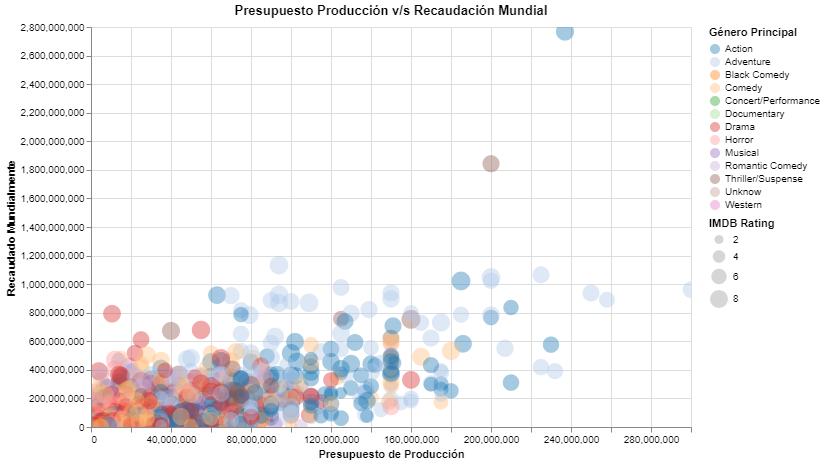

In [21]:
movies_chart()

### Ejercicio 2.3

Generar widgets para cada uno de los argumentos de la función `movies_chart`, los nombres sugeridos son:

- `year_widget` para el argumente `year`, debe ser un `widget.IntRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 1 unidad.
- `imdb_widget` para el argumente `imdb`, debe ser un `widget.FloatRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 0.1 unidad.
- `genre_widget` para el argumente `genre`, debe ser un `widget.SelectMultiple`, por defecto deben venir selecionados todos los géneros..
- `budget_widget` para el argumente `budget`, debe ser un `widget.IntRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 1 unidad.
- `ww_gross_widget` para el argumente `ww_gross`, debe ser un `widget.IntRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 1 unidad.

Todo widget debe tener un valor adecuado para el argumento `description` y configurar el argumento `continuous_update = False`.

In [22]:
year_widget = widgets.IntRangeSlider(
    min=int(movies['Release_Date'].min().year),
    max=int(movies['Release_Date'].max().year),
    value=(min,max),
    continuous_update = False,
    description='Fecha de estreno',
    step=1
)

imdb_widget = widgets.FloatRangeSlider(
    min=int(movies['IMDB_Rating'].min()),
    max=int(movies['IMDB_Rating'].max()),
    value=(min, max),
    continuous_update = False,
    description='Rating IMDB',
    step=0.1
)

genre_widget = widgets.SelectMultiple(
    options=movies['Major_Genre'].unique().tolist(),
    value=movies['Major_Genre'].unique().tolist(),
    description='Género principal'
)

budget_widget = widgets.IntRangeSlider(
    min=int(movies['Production_Budget'].min()),
    max=int(movies['Production_Budget'].max()),
    value=(min, max),
    continuous_update = False,
    description='Presupuesto de producción',
    step=1
)

ww_gross_widget = widgets.IntRangeSlider(
    min=int(movies['Worldwide_Gross'].min()),
    max=int(movies['Worldwide_Gross'].max()),
    value=(min, max),
    continuous_update = False,
    description='Recaudación mundial',
    step=1
)

TraitError: Element of the 'value' trait of an IntRangeSlider instance must be an int, but a value of <built-in function min> <class 'builtin_function_or_method'> was specified.

Finalmente, haciendo uso de `interactive`, la función `movies_chart` y todos los widgets es posible crear un _dashboard_ interactivo con los datos de las películas.

Respira profundo y explora tu creación!

In [ ]:
movies_dashboard = interactive(
    movies_chart,
    year=year_widget,
    imdb_rating=imdb_widget,
    genre=genre_widget,
    budget=budget_widget,
    ww_gross=ww_gross_widget
)
movies_dashboard

In [ ]:
_Creo que no pude instalar correctamente el paquete para widgets, ya que no tengo el ambiente mat281, de igual manera lo instalé
en 'base' pero al ejecutar conda list nodejs, no me sale nada; siendo que sí instala. Bueno, creo tener todo el código como debería ser
solo que no lo lee correctamente._